In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle

# EX sheet4

In [2]:
df=pd.read_csv('.\\OneDrive\\Desktop\\Accounting\\Data Scientist\\spyder data visualization\\carrotPrices.csv')
df_o=pd.read_csv('.\\OneDrive\\Desktop\\Accounting\\Data Scientist\\spyder data visualization\\onionPrices.csv')

In [3]:
df['price']=[round(val,2) for val in df['price']]
df_o['price']=[round(val,2) for val in df_o['price']]
lowest_price=min(df['price'].tolist()+df_o['price'].tolist())   # the min of 2 lists combined
highest_price=max(df['price'].tolist()+df_o['price'].tolist())
# set the bins
bins=[]
for val in range(int(lowest_price*100)-1,int(highest_price*100)+1,5):
    bins.append(val/100)
        
# finding which bin is the ave at.
ave=np.average(df['price'])
ave_o=np.average(df_o['price'])
ind=0
for i in range(len(bins)):
    if ave>=bins[i] and ave<=bins[i+1]:
        ind=i
# print(ind)

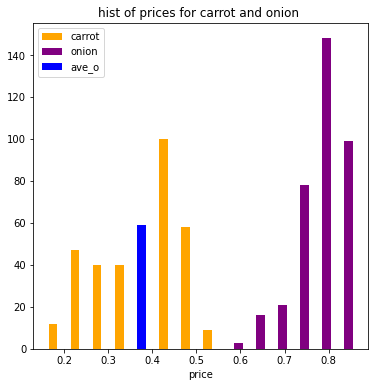

In [4]:
fig=plt.figure(figsize=(6,6))
ax1=fig.add_subplot(111)
N,bins,patches=plt.hist(x=(df['price'],df_o['price']),color=('orange','purple'),
                        bins=bins,align='mid',range=(lowest_price,highest_price))
plt.xlabel('price')
plt.title('hist of prices for carrot and onion ')

# add legend with Rectangle or just using patches
# rect=Rectangle((0,0),1,1,color='orange')
patches[0][ind].set_facecolor('blue')
boxes=[patches[0][0],patches[1][0],patches[0][ind]]
labels=['carrot','onion','ave_o']
plt.legend(boxes,labels)

plt.show()

In [5]:
def get_month(val):
    return int(val.split('-')[1])
# get the month average for carrot
df['month']=df['date'].apply(get_month)
average_monthly=[]
for i in range(1,13):
    df_month_i=df.loc[df['month']==i]
    average_monthly.append(round(np.average(df_month_i['price']),4))
    
# get the month average for onion    
df_o['month']=df_o['date'].apply(get_month)
average_o_monthly=[]
for i in range(1,13):
    df_o_month_i=df_o.loc[df_o['month']==i]
    average_o_monthly.append(round(np.average(df_o_month_i['price']),4))    

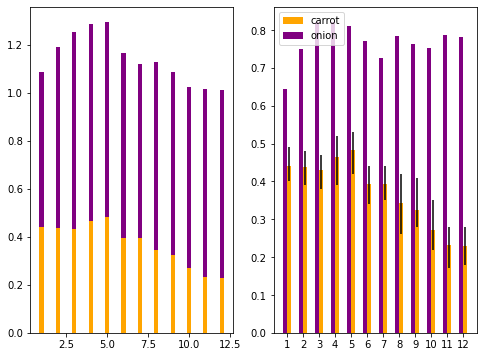

In [6]:
fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(121)     # stacking
plt.bar(x=range(1,13),height=average_monthly,
        width=0.25,color='orange',label='carrot',align='center')
plt.bar(x=range(1,13),height=average_o_monthly,
        width=0.25,color='purple',label='onion',align='center',bottom=average_monthly)

ax2=fig.add_subplot(122)    
# add the error bars for carrot
mins=[]
maxs=[]
for i in range(1,13):
    df_month_i=df.loc[df['month']==i]
    mins.append(np.min(df_month_i['price']))
    maxs.append(np.max(df_month_i['price']))

lower_error_length=np.array(average_monthly)-np.array(mins)
upper_error_length=np.array(maxs)-np.array(average_monthly)
    
plt.bar(x=range(1,13),height=average_monthly,
        width=0.25,color='orange',label='carrot',align='edge',
        yerr=[lower_error_length,upper_error_length],ecolor='black')

plt.bar(x=range(1,13),height=average_o_monthly,                    # seperate, not stacking
        width=-0.25,color='purple',label='onion',align='edge')
plt.xticks(range(1,13))
plt.legend()
plt.show()

In [7]:
df['price'].min(),df['price'].max()
np.average(df['price'])

0.3703835616438356

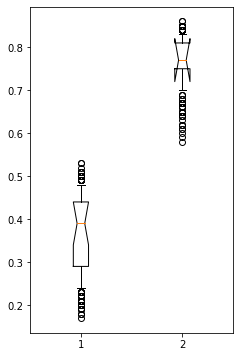

In [8]:
fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(121)
# get the median (*sort*: list.sort() or df=df.sort_values)
median_index=int(len(df['price'])/2)
df['price'].to_numpy().sort()
median_value=df['price'].to_numpy()[median_index]

df_o['price'].to_numpy().sort()
median_o_value=df_o['price'].to_numpy()[median_index]

plt.boxplot(x=[df['price'],df_o['price']],
           whis=(10,90),
           notch=True,
           conf_intervals=[[median_value-0.05,median_value+0.05],[median_o_value-0.05,median_o_value+0.05]])
plt.show()


In [9]:
df=pd.read_csv('.\\OneDrive\\Desktop\\Accounting\\Data Scientist\\spyder data visualization\\carrotPrices.csv')
df_o=pd.read_csv('.\\OneDrive\\Desktop\\Accounting\\Data Scientist\\spyder data visualization\\onionPrices.csv')

In [10]:
new=df['price'].to_numpy()
new.sort()
new[182]
df.head()

,Unnamed: 0,date,price
0,0,2018-01-01,0.165202
1,1,2018-01-02,0.177186
2,2,2018-01-03,0.178788
3,3,2018-01-04,0.179504
4,4,2018-01-05,0.185804


In [11]:
df_sorted=df.sort_values('price', inplace=False)    # the only way to not update
print(df.head())
df_sorted.head()


   Unnamed: 0        date     price
0           0  2018-01-01  0.165202
1           1  2018-01-02  0.177186
2           2  2018-01-03  0.178788
3           3  2018-01-04  0.179504
4           4  2018-01-05  0.185804


,Unnamed: 0,date,price
0,0,2018-01-01,0.165202
1,1,2018-01-02,0.177186
2,2,2018-01-03,0.178788
3,3,2018-01-04,0.179504
4,4,2018-01-05,0.185804
